IMPORT

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

Clean data


In [14]:
df = pd.read_csv('../ML/dataset/SQLiV4.csv', encoding='utf-8') # Read the dataset.
df.head(10)

,Sentence,Label,Unnamed: 2,Unnamed: 3
0,""" or pg_sleep ( __TIME__ ) --",1,NaN,NaN
1,create user name identified by pass123 tempora...,NaN,1,NaN
2,AND 1 = utl_inaddr.get_host_address ( ...,1,NaN,NaN
3,select * from users where id = '1' or @ @1 ...,1,NaN,NaN
4,"select * from users where id = 1 or 1#"" ( ...",1,NaN,NaN
5,select name from syscolumns where id = ...,1,NaN,NaN
6,select * from users where id = 1 +$+ or 1 =...,1,NaN,NaN
7,"1; ( load_file ( char ( 47,101,116,99,47...",1,NaN,NaN
8,select * from users where id = '1' or ||/1 ...,1,NaN,NaN
9,select * from users where id = '1' or \.<\ ...,1,NaN,NaN


In [15]:
del df['Unnamed: 2']

del df['Unnamed: 3']

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26573 entries, 0 to 26572
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  26558 non-null  object
 1   Label     26318 non-null  object
dtypes: object(2)
memory usage: 415.3+ KB


In [17]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26303 entries, 0 to 26572
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  26303 non-null  object
 1   Label     26303 non-null  object
dtypes: object(2)
memory usage: 616.5+ KB


fixing label error


In [18]:
unique_label = pd.unique(df['Label'])

print('\n'.join(l for l in unique_label))

1
SELECT *
 --
 desc users
 OR
waitfor delay '0:0:__TIME__'--
 drop table temp --
0
 grant resource to name
 EXEC SelectAllCustomers
 /*Select all the columns of all the records in the Customers table:*/
*/
 CREATE VIEW [Products Above Average Price] AS
 CREATE OR REPLACE VIEW view_name AS
 DROP TABLE Suppliers
 CREATE PROCEDURE SelectAllCustomers AS
  EXEC SelectAllCustomers
 DELETE FROM Customers  WHERE CustomerName = 'Alfreds Futterkiste'
 CREATE OR REPLACE VIEW [Brazil Customers] AS
  SELECT * FROM CustomersLIMIT 3
SELECT * FROM Customers
 SELECT TOP 50 PERCENT * FROM Customers
 SELECT * FROM CustomersFETCH FIRST 50 PERCENT ROWS ONLY
SELECT TOP 3 * FROM Customers
 SELECT * FROM Customers
SELECT SUM ( Quantity ) 
 SELECT column_name ( s ) 
 SELECT City FROM Customers


In [19]:
df = df.drop(df[(df['Label'] != '0') & (df['Label'] != '1')].index) # Dropping the label values, that are different from 0 or 1.
df['Label'] = df['Label'].astype('int') # Convert the label type to integer.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26263 entries, 0 to 26572
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  26263 non-null  object
 1   Label     26263 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 512.9+ KB


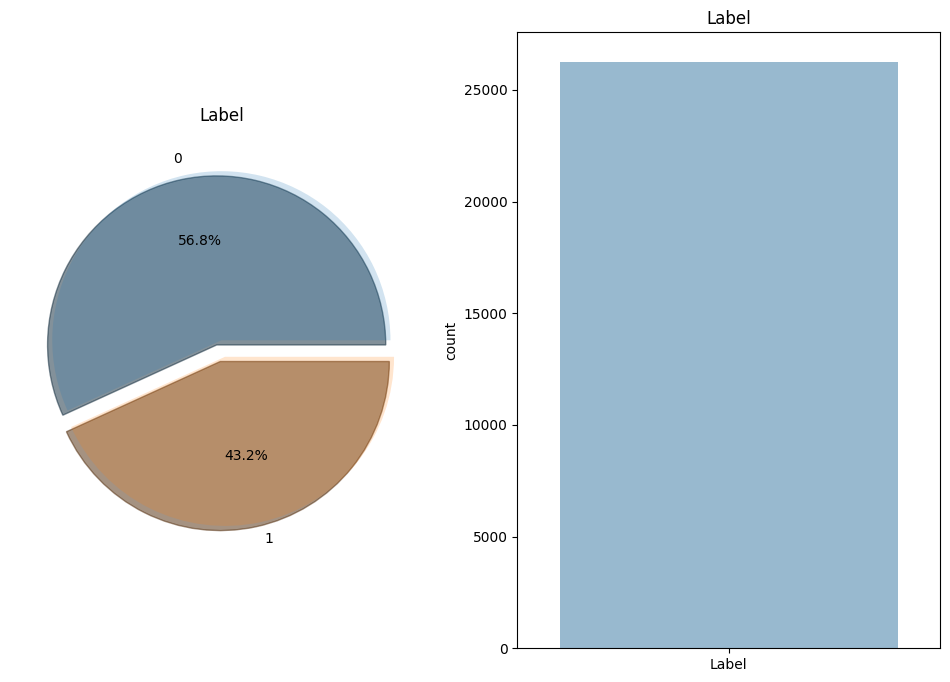

In [20]:
f,ax=plt.subplots(1,2,figsize=(12,8))
df['Label'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True, wedgeprops={'alpha':0.2})


ax[0].set_title('Label')
ax[0].set_ylabel('')

sns.countplot(data=df,ax=ax[1], alpha=0.5)
ax[1].set_title('Label')
plt.show()

In [77]:
df.to_csv('final.csv')

In [27]:
df.head()
print("df.shape: ", df.shape)

df.shape:  (30609, 2)


traning section


In [21]:
from tensorflow.keras.utils import plot_model
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from nltk.corpus import stopwords
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import precision_recall_curve,precision_recall_fscore_support
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import joblib
from sklearn.svm import SVC
vectorizer = CountVectorizer(min_df = 2, max_df = 0.8, stop_words = stopwords.words('english'))

In [22]:
X = df['Sentence']
y = df['Label']
print(X.shape, y.shape)
print("Dataset Input:", "\n", X.head(5))
print("Dataset Label:", "\n", y.head(5))

(26263,) (26263,)
Dataset Input: 
 0                    " or pg_sleep  (  __TIME__  )  --
2     AND 1  =  utl_inaddr.get_host_address   (    ...
3     select * from users where id  =  '1' or @ @1 ...
4     select * from users where id  =  1 or 1#"  ( ...
5     select name from syscolumns where id   =     ...
Name: Sentence, dtype: object
Dataset Label: 
 0    1
2    1
3    1
4    1
5    1
Name: Label, dtype: int32


In [23]:
import nltk
nltk.download('stopwords')

X = vectorizer.fit_transform(X.values.astype('U')).toarray()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(21010, 6402)
(21010,)
(5253, 6402)
(5253,)


In [25]:
f1_dict = {}
precision_dict = {}
recall_dict = {}
accuracy_dict = {}
train_accuracy = {}
validation_accuracy = {}
test_accuracy = {}

Naive Bay

In [26]:
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
y_pred = nb_clf.predict(X_test)
print(f"Accuracy of Naive Bayes on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of Naive Bayes on test set : {f1_score(y_pred, y_test)}")

# Updates model score to f1_dict
f1_dict["NaiveBayes"] = f1_score(y_pred, y_test)
precision_dict["NaiveBayes"] = precision_score(y_pred, y_test)
recall_dict["NaiveBayes"] = recall_score(y_pred, y_test)
accuracy_dict['NaiveBayes'] = accuracy_score(y_pred, y_test)

joblib.dump(nb_clf, 'Naive Bayv2')

Accuracy of Naive Bayes on test set : 0.7877403388539882
F1 Score of Naive Bayes on test set : 0.8004295686414891


['Naive Bayv2']

Accuracy of SVM on test set : 0.7477948382881411
F1 Score of SVM on test set : 0.4973958333333333


NameError: name 'f1_dict' is not defined

In [27]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
print(f"Accuracy of Random Forest on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of Random Forest on test set : {f1_score(y_pred, y_test)}")

# Updates model score to f1_dict
f1_dict["RandomForest"] = f1_score(y_pred, y_test)
precision_dict["RandomForest"] = precision_score(y_pred, y_test)
recall_dict["RandomForest"] = recall_score(y_pred, y_test)
accuracy_dict['RandomForest'] = accuracy_score(y_pred, y_test)

Accuracy of Random Forest on test set : 0.9152865029506948
F1 Score of Random Forest on test set : 0.8996617812852312


In [28]:
joblib.dump(rf_clf, 'random-forestv2')

['random-forestv2']

In [29]:
rf_ = joblib.load('random-forestv2')
rf_

RandomForestClassifier()

In [30]:
joblib.dump(vectorizer, 'vectorizerv2')

['vectorizerv2']

In [42]:
print(X_test)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [45]:
X=["http://localhost:3000/employee?id=E004 ' 1) or benchmark(10000000,MD5(1))#",
 "http://localhost:3000/employee?id=E002 ' ));waitfor delay '0:0:5'--",
 "http://localhost:3000/employee?id=E005 ' ) or pg_sleep(5)--",
 "http://localhost:3000/employee?id=E003 ' ));waitfor delay '0:0:5'--",
 'http://localhost:3000/employee?id=E004 " waitfor delay \'00:00:05\'#',
 'http://localhost:3000/employee?id=E003 " waitfor delay \'00:00:05\'--',
 "http://localhost:3000/employee?id=E001 ' SLEEP(5)#",
 "http://localhost:3000/employee?id=E004 ' SLEEP(5)--",
 "http://localhost:3000/employee?id=E002 ' AND (SELECT * FROM (SELECT(SLEEP(5)))YjoC) AND '%'='",
 'http://localhost:3000/employee?id=E004 " or SLEEP(5)']
X = vectorizer.transform(X).toarray()


In [46]:
rf_.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [35]:
X.shape

(4, 6509)

In [ ]:
vectorizer.pre